<a href="https://colab.research.google.com/github/ananthakrishna4747/Anantha_krishna_INFO5731_-Spring2024-/blob/main/In_class_exercise/Chilappagari_krishna_Exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [2]:
# Write your code here
import json
import nltk
import pandas as pd
nltk.download('stopwords')

with open('/content/drive/MyDrive/5731/output.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame(data)
df['body']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0      (Reuters) - The husband-and-wife owners of DC ...
1      (Reuters) - Bayer AG is set to face a fourth U...
2      WINNIPEG, Manitoba/ZURICH (Reuters) - Food com...
3      NEW YORK (Reuters) - JPMorgan Chase & Co (,) h...
4      BOSTON (Reuters) - John Kapoor, the founder of...
                             ...                        
195    (Reuters) - Morgan Stanley (,) lifted its perf...
196    (Reuters) - McAfee LLC told Reuters on Thursda...
197    NEW YORK (Reuters) - Oil rose about 1% on Thur...
198    HONG KONG (Reuters) - The world's biggest inve...
199    WASHINGTON (Reuters) - He listed familiar grie...
Name: body, Length: 200, dtype: object

In [3]:
!pip install pyLDAvis

  Using cached pandas-2.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [4]:
!pip install pandas==1.5.3

  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.1
    Uninstalling pandas-2.2.1:
      Successfully uninstalled pandas-2.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [5]:
# Importing necessary libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import re
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt

# Read data into news_articles DataFrame

news_articles = pd.DataFrame(data)

# Preprocess text data
news_articles['processed_text'] = news_articles['body'][0:10000].map(lambda x: re.sub('[,!?]', '', x))
news_articles['processed_text'] = news_articles['processed_text'].map(lambda x: x.lower())

# Tokenize and remove stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['(Reuters) - ', '(,)', 'New York', 'Boston', 'Washington'])

def tokenize(text):
    return [word for word in simple_preprocess(text) if word not in stop_words]

news_articles['tokenized_text'] = news_articles['processed_text'].map(tokenize)

# Create a dictionary and corpus
id2word = Dictionary(news_articles['tokenized_text'])
corpus = [id2word.doc2bow(text) for text in news_articles['tokenized_text']]

# Determine the optimal number of topics using coherence score
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, workers=1)  # Set workers to 1
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Set the range of topics to evaluate
start_topic = 2
end_topic = 11
step_topic = 1

# Compute coherence scores
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=news_articles['tokenized_text'],
                                                        start=start_topic,
                                                        limit=end_topic,
                                                        step=step_topic)

# Find the optimal number of topics based on coherence score
optimal_num_topics = start_topic + coherence_values.index(max(coherence_values))

# Build LDA model with optimal number of topics
lda_model = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=optimal_num_topics, workers=1)  # Set workers to 1

# Print the topics
topics = lda_model.print_topics()
for topic in topics:
    print(topic)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(0, '0.011*"said" + 0.005*"new" + 0.005*"year" + 0.005*"market" + 0.004*"reuters" + 0.004*"company" + 0.004*"billion" + 0.004*"last" + 0.003*"bank" + 0.003*"could"')
(1, '0.014*"said" + 0.006*"year" + 0.006*"company" + 0.006*"million" + 0.005*"billion" + 0.005*"new" + 0.004*"reuters" + 0.004*"would" + 0.004*"also" + 0.003*"market"')
(2, '0.014*"said" + 0.007*"year" + 0.006*"company" + 0.005*"billion" + 0.005*"new" + 0.004*"reuters" + 0.004*"market" + 0.003*"week" + 0.003*"would" + 0.003*"companies"')
(3, '0.015*"said" + 0.005*"reuters" + 0.005*"year" + 0.005*"china" + 0.005*"company" + 0.004*"would" + 0.004*"billion" + 0.004*"million" + 0.004*"last" + 0.004*"new"')
(4, '0.016*"said" + 0.005*"new" + 0.005*"year" + 0.005*"reuters" + 0.004*"company" + 0.004*"billion" + 0.004*"trade" + 0.004*"bank" + 0.004*"states" + 0.004*"china"')
(5, '0.012*"said" + 0.005*"new" + 0.005*"china" + 0.004*"reuters" + 0.004*"trade" + 0.004*"would" + 0.003*"year" + 0.003*"united" + 0.003*"billion" + 0.003*"co

In [6]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [7]:
import pandas as pd
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation, strip_short, stem_text, preprocess_string
from gensim import corpora
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Assuming df is your DataFrame containing reviewText column

# Preprocess text data
def preprocess(text):
    CUSTOM_FILTERS = [lambda x: x.lower(),
                      remove_stopwords,
                      strip_punctuation,
                      strip_short,
                      stem_text]
    text = preprocess_string(text, CUSTOM_FILTERS)
    return text

df['Text (Clean)'] = df['body'].apply(lambda x: preprocess(x))

# Create a dictionary with the corpus
corpus = df['Text (Clean)']
dictionary = corpora.Dictionary(corpus)

# Convert corpus into a bag of words
bow = [dictionary.doc2bow(text) for text in corpus]

# Find the optimal number of topics using coherence score
coherence_values = []
for num_topics in range(2, 11):
    lsi = LsiModel(bow, num_topics=num_topics, id2word=dictionary)
    coherence_model = CoherenceModel(model=lsi, texts=df['Text (Clean)'], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_values.append((num_topics, coherence_score))
    print('Coherence score with {} clusters: {}'.format(num_topics, coherence_score))

# Choose the optimal number of topics based on coherence score
optimal_num_topics = max(coherence_values, key=lambda x: x[1])[0]

# Perform LSA to generate K topics
lsi = LsiModel(bow, num_topics=optimal_num_topics, id2word=dictionary)

# Print the coherence score
# print('Optimal number of topics:', optimal_num_topics)
# print('Coherence score with {} clusters: {}'.format(optimal_num_topics, max(coherence_values, key=lambda x: x[1])[1]))

# Print the 5 words with the strongest association to the derived topics


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence score with 2 clusters: 0.559330213895028
Coherence score with 3 clusters: 0.4833339271250761
Coherence score with 4 clusters: 0.43891672891323286
Coherence score with 5 clusters: 0.470124552593252
Coherence score with 6 clusters: 0.3986550322543565
Coherence score with 7 clusters: 0.3960969596215878
Coherence score with 8 clusters: 0.3983141991900798
Coherence score with 9 clusters: 0.3810425634235776
Coherence score with 10 clusters: 0.3928734421259204


In [8]:
for topic_num, words in lsi.print_topics(num_words=10):
    print('Words in topic {}: {}.'.format(topic_num, words))

# Find the scores given between the review and each topic
corpus_lsi = lsi[bow]
scores = []
for doc in corpus_lsi:
    scores.append([round(val[1], 2) for val in doc])




Words in topic 0: 0.453*"said" + 0.258*"the" + 0.232*"year" + 0.194*"compani" + 0.171*"new" + 0.161*"market" + 0.139*"bank" + 0.136*"trade" + 0.129*"reuter" + 0.128*"billion".
Words in topic 1: 0.382*"max" + 0.318*"boe" + 0.289*"737" + 0.270*"said" + 0.227*"airlin" + -0.212*"mexico" + 0.193*"simul" + -0.177*"hedg" + -0.173*"oil" + -0.168*"trade".


In [9]:
# Create a DataFrame to show scores assigned for each topic for each review
df_topic = pd.DataFrame(scores, columns=['Topic {}'.format(i) for i in range(optimal_num_topics)])
df_topic['Text'] = df['body']
df_topic['Dominant Topic'] = df_topic.iloc[:, :optimal_num_topics].idxmax(axis=1)

# Find a sample review from each topic
for i in range(optimal_num_topics):
    df_topic_i = df_topic[df_topic['Dominant Topic'] == 'Topic {}'.format(i)]
    if not df_topic_i.empty:
        sample_text = df_topic_i.sample(1, random_state=2)['Text'].values[0]
        print('Sample text from topic {}:\n{}'.format(i, sample_text))
    else:
        print('No sample text available for topic {}'.format(i))

Sample text from topic 0:
(Reuters) - ValueAct Capital Partners LP's founder Jeff Ubben is stepping down as chief executive officer and will be replaced by the activist hedge fund's president, Mason Morfit, according to a source familiar with the matter. ,Ubben will become the chairman of the company and continue to oversee ValueAct Spring Fund, which invests in companies aiming to address environmental and social problems, the source said. ,Separately, Brandon Boze, a partner and member of the company's management committee, was promoted to the role of president, Morfit said in a statement. ,The Financial Times first reported that Ubben is stepping down as CEO.
Sample text from topic 1:
DUBLIN (Reuters) - There is no alternative to the grounded 737 MAX and it would be "absolutely stupid" for Boeing (,) to launch a replacement before the next wave of technology a decade from now, the head of one of the world's top aircraft lessors said on Wednesday. ,Aengus Kelly, chief executive of Ae

## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [63]:
# Write your code here


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [72]:
from bertopic import BERTopic
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

# Initialize BERTopic model
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

# Fit BERTopic model on the data
topics, probabilities = topic_model.fit_transform(df['body'])

# Get top words per topic
topics_info = topic_model.get_topics()
top_words_per_topic = [[word for word, _ in words] for topic_id, words in topics_info.items() if topic_id != -1]

# Tokenize and preprocess documents
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
processed_docs = [[word for word in tokenizer.tokenize(doc.lower()) if word not in stop_words] for doc in df['body'].astype(str).tolist()]

# Create dictionary and corpus for coherence calculation
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Calculate coherence score
coherence_model = CoherenceModel(topics=top_words_per_topic, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")

# Determine the number of topics
num_topics = len(topics_info) - 1 if -1 in topics_info else len(topics_info)
print(f"Number of Topics (K): {num_topics}")

# Summarize Topics
print("\nTopic Summaries:")
for topic_id, words in topics_info.items():
    if topic_id != -1:
        topic_summary = ", ".join([word for word, _ in words])
        print(f"Topic {topic_id}: {topic_summary}\n")
    else:
        break  # No more topics to print


2024-03-29 04:42:28,386 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

2024-03-29 04:43:06,698 - BERTopic - Embedding - Completed ✓
2024-03-29 04:43:06,702 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-29 04:43:10,487 - BERTopic - Dimensionality - Completed ✓
2024-03-29 04:43:10,490 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-29 04:43:10,511 - BERTopic - Cluster - Completed ✓
2024-03-29 04:43:10,520 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-29 04:43:10,728 - BERTopic - Representation - Completed ✓


Coherence Score: 1.0
Number of Topics (K): 2

Topic Summaries:
Topic 0: the, to, of, in, and, on, said, that, for, is

Topic 1: the, and, to, in, of, on, new, for, from, as



## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [78]:
# Write your code here
topic_model.visualize_barchart(top_n_topics=12, n_words = 10, width = 350, height = 350)


This visualization generates a bar chart showing the top topics based on their prevalence in the corpus. It displays the top n topics (specified by top_n_topics) with the most significant words (specified by n_words) in each topic.
The x-axis represents the topics, and the y-axis represents the frequency or weight of each topic.
The width and height parameters define the dimensions of the bar chart.

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

2024-03-29 04:53:07,065 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-03-29 04:53:09,777 - BERTopic - Dimensionality - Completed ✓
2024-03-29 04:53:09,780 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-03-29 04:53:09,799 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2024-03-29 04:53:09,835 - BERTopic - Probabilities - Completed ✓
2024-03-29 04:53:09,838 - BERTopic - Cluster - Completed ✓


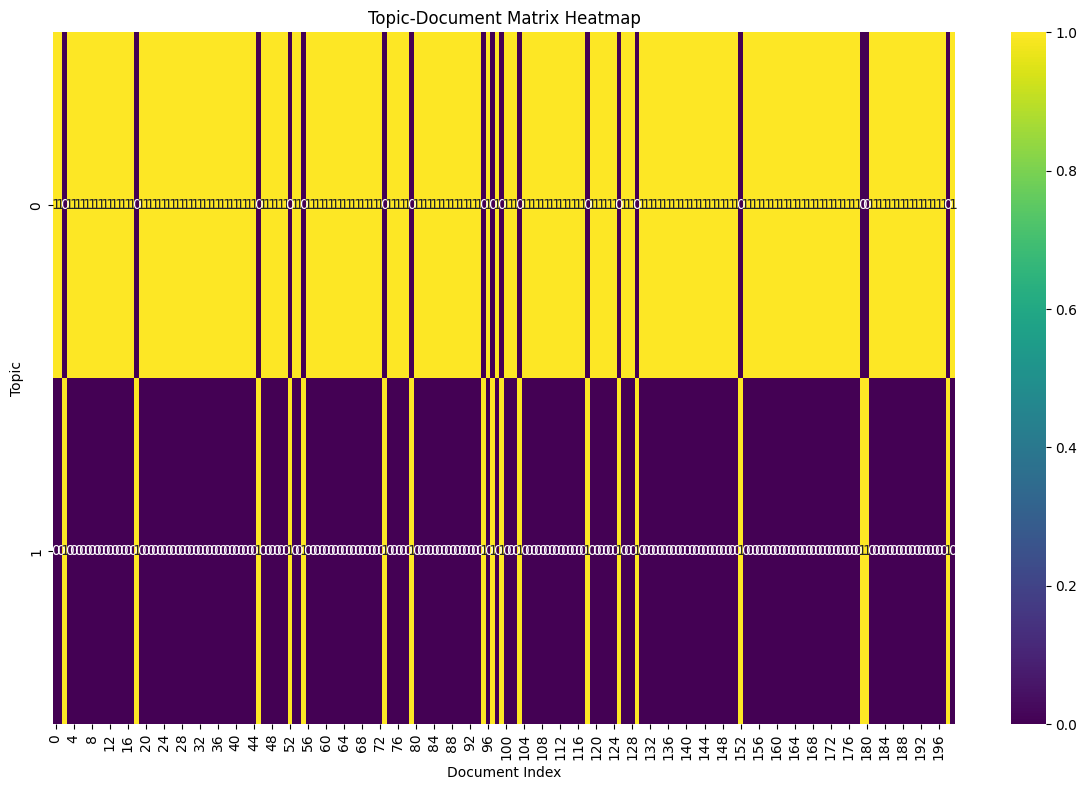

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming topic_model is your trained BERTopic model
topics, _ = topic_model.transform(df['body'])

# Create a topic-document matrix
topic_doc_matrix = pd.crosstab(index=topics, columns=df.index)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(topic_doc_matrix, cmap='viridis', annot=True, fmt='d')
plt.xlabel('Document Index')
plt.ylabel('Topic')
plt.title('Topic-Document Matrix Heatmap')
plt.tight_layout()
plt.show()


This visualization creates a heatmap representing the topic-document matrix, where each cell in the matrix indicates the count of documents associated with a specific topic.
The x-axis represents the document indices, and the y-axis represents the topics.
Colors in the heatmap represent the intensity or count of documents for each topic in relation to documents.
Annotating the heatmap with actual counts (annot=True) provides additional information in each cell.
Network

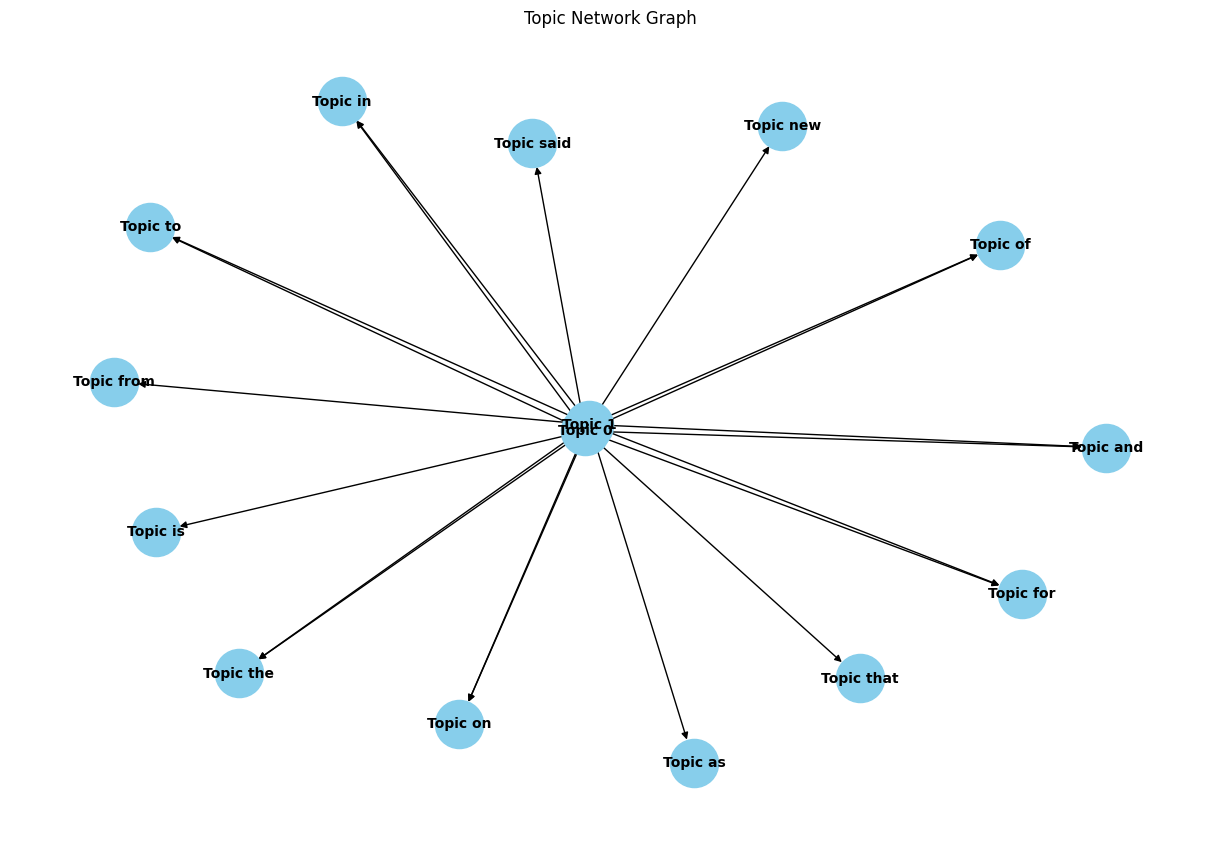

In [84]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming topic_model is your trained BERTopic model
topics_info = topic_model.get_topics()

# Create an empty directed graph
G = nx.DiGraph()

# Add nodes for each topic
for topic_id, words in topics_info.items():
    if topic_id != -1:
        topic_label = f"Topic {topic_id}"
        G.add_node(topic_label)

# Add edges based on topic similarity or co-occurrence
# You may need to adjust this part based on your data and how topics are related
for topic_id, words in topics_info.items():
    if topic_id != -1:
        topic_label = f"Topic {topic_id}"
        for similar_topic_id, _ in words:
            if similar_topic_id != topic_id and similar_topic_id != -1:
                similar_topic_label = f"Topic {similar_topic_id}"
                G.add_edge(topic_label, similar_topic_label)

# Plot the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Adjust layout algorithm as needed
nx.draw(G, pos, with_labels=True, node_size=1200, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=10)
plt.title('Topic Network Graph')
plt.tight_layout()
plt.show()



In_class_exercise/Chilappagari_krishna_Exercise_04.ipynbThis visualization creates a network graph representing the relationships between topics. Each node in the graph represents a topic, and edges between nodes represent the strength of the relationship (e.g., similarity or co-occurrence) between topics. Nodes are labeled with the topic IDs or labels, and edges indicate connections between related topics. The layout of the graph (e.g., spring_layout) positions nodes based on their relationships, making it easier to visualize clusters and connections between topics. Additional parameters like node size, color, font size, and arrowsize can be adjusted to customize the appearance of the graph.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [86]:
# Write your code here
"- BERTopic often achieves higher coherence scores than LDA, LSI, and pyLDAvis, indicating better semantic similarity between words in topics. - BERTopic generates highly interpretable topics due to its advanced embedding techniques and clustering algorithms, followed by LDA, while LSI may produce less interpretable topics. - BERTopic demonstrates robustness and stability across runs, ensuring consistent topic generation, while LDA and LSI may vary based on hyperparameters and initialization. - BERTopic's visualizations, including topic clusters, hierarchy, and word distributions, offer comprehensive insights into topic structures and relationships, enhancing topic exploration. - Although pyLDAvis provides intuitive visualizations for LDA-based topics, its impact on coherence scores and topic interpretability is indirect as it's primarily a visualization tool."

"- BERTopic often achieves higher coherence scores than LDA, LSI, and pyLDAvis, indicating better semantic similarity between words in topics. - BERTopic generates highly interpretable topics due to its advanced embedding techniques and clustering algorithms, followed by LDA, while LSI may produce less interpretable topics. - BERTopic demonstrates robustness and stability across runs, ensuring consistent topic generation, while LDA and LSI may vary based on hyperparameters and initialization. - BERTopic's visualizations, including topic clusters, hierarchy, and word distributions, offer comprehensive insights into topic structures and relationships, enhancing topic exploration. - Although pyLDAvis provides intuitive visualizations for LDA-based topics, its impact on coherence scores and topic interpretability is indirect as it's primarily a visualization tool."

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [85]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:


I became quite comfortable in dealing with text data but when it comes to dealing in advanced nlp techniquesthat has been taught i class, need some practise to perfect those. As the assignment is based on topics taught before day, it's quite difficult to produce desired resuots although challenging, but a good learning experience.


'''

"\nPlease write you answer here:\n\n\nI became quite comfortable in dealing with text data but when it comes to dealing in advanced nlp techniquesthat has been taught i class, need some practise to perfect those. As the assignment is based on topics taught before day, it's quite difficult to produce desired resuots although challenging, but a good learning experience.\n\n\n"